In [12]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten
import random as python_random
import random
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization
import os

np.random.seed(2)
python_random.seed(2)
tf.random.set_seed(12)

df_train = pd.read_csv('201806-201811_train.csv')
df_train = df_train.drop(['JOIN_KEY','YM'], axis=1)

df_test = pd.read_csv('201806-201811_test.csv')
df_test = df_test.drop(['JOIN_KEY','YM'], axis=1)

df_12 = pd.read_csv('201812.csv')
df_12 = df_12.drop(['JOIN_KEY','YM'], axis=1)
df_12_train = df_12[:16193]
df_12_test = df_12[16193:]

#df = df.drop(["JOIN_KEY","DLQ_AMT_SUM","299","101","103","104","199","201","202","DLQ_AMT_AVG","299",'YM'], axis = 1)

In [13]:
print(df_train.shape)
print(df_test.shape)
print(df_12.shape)
print(df_12_train.shape)
print(df_12_test.shape)

(97158, 58)
(41640, 58)
(23133, 58)
(16193, 58)
(6940, 58)


In [96]:
# DataFrame의 맨 마지막 컬럼이 레이블, 나머지는 피처들
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [97]:
X.head(8)

,GENDER,AGE,LN_AMT_SUM,LN_AMT_AVG,LN_AMT_AVG_INC,LN_CD_2_0,LN_CD_2_100,LN_CD_2_150,LN_CD_2_170,LN_CD_2_200,...,INT_GOV,INT_BENCH,INT_COFIX,CSI,CPI,LAI,M2,UNEMP_RATE,SALES_PRICE,GDP
0,2,62,14000,14000.0,0.0,0,0,0,0,0,...,2.122,1.50,1.85,106.3,104.13,-3,112556.6,3.7,92.531,1725373.4
1,2,62,14000,14000.0,0.0,0,0,0,0,0,...,2.123,1.50,1.87,101.8,103.93,-3,112415.5,3.7,93.020,1725373.4
2,2,62,14000,14000.0,0.0,0,0,0,0,0,...,1.916,1.50,1.89,99.9,104.85,-3,113032.1,4.0,94.107,1725373.4
3,2,62,14000,14000.0,0.0,0,0,0,0,0,...,2.005,1.50,1.90,100.7,105.65,-3,115309.5,3.6,97.716,1725373.4
4,2,62,14000,14000.0,0.0,0,0,0,0,0,...,1.939,1.50,1.93,99.9,105.46,-33,116315.8,3.5,99.512,1725373.4
5,2,62,14000,14000.0,0.0,0,0,0,0,0,...,1.897,1.75,1.95,96.5,104.71,-33,116764.7,3.2,99.905,1725373.4
6,2,62,14000,14000.0,0.0,0,0,0,0,0,...,1.817,1.75,1.99,97.6,104.35,-33,117289.8,3.4,100.014,1725373.4
7,1,22,4300,4300.0,0.0,0,0,0,0,0,...,2.122,1.50,1.85,106.3,104.13,-3,112556.6,3.7,92.531,1725373.4


In [98]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: DLQ_YN, dtype: int64

# MinMaxScaler

In [99]:
#columns = ['LN_AMT_SUM','LN_AMT_AVG', 'INT_GOV','INT_BENCH','INT_COFIX','CSI','CPI','LAI','M2','UNEMP_RATE','SALES_PRICE','GDP']

from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.
scaler.fit(X)
X_scaled = scaler.transform(X)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
X_scaled = pd.DataFrame(data=X_scaled, columns=X.columns)
print('feature들의 최소 값')
print(X_scaled.min())
print('\nfeature들의 최대 값')
print(X_scaled.max())



feature들의 최소 값
GENDER            0.0
AGE               0.0
LN_AMT_SUM        0.0
LN_AMT_AVG        0.0
LN_AMT_AVG_INC    0.0
LN_CD_2_0         0.0
LN_CD_2_100       0.0
LN_CD_2_150       0.0
LN_CD_2_170       0.0
LN_CD_2_200       0.0
LN_CD_2_210       0.0
LN_CD_2_220       0.0
LN_CD_2_230       0.0
LN_CD_2_240       0.0
LN_CD_2_245       0.0
LN_CD_2_250       0.0
LN_CD_2_270       0.0
LN_CD_2_271       0.0
LN_CD_2_290       0.0
LN_CD_2_500       0.0
LN_CD_2_510       0.0
LN_CD_2_590       0.0
LN_CD_2_700       0.0
LN_CD_2_710       0.0
SCTR_CD_1         0.0
SCTR_CD_3         0.0
SCTR_CD_5         0.0
SCTR_CD_6         0.0
SCTR_CD_8         0.0
SCTR_CD_17        0.0
SCTR_CD_21        0.0
SCTR_CD_98        0.0
MULTIPLE_DEBT     0.0
NOBANK_RATE       0.0
CR_HO_RATE        0.0
DLQ_AMT_SUM       0.0
DLQ_AMT_AVG       0.0
101               0.0
103               0.0
104               0.0
199               0.0
201               0.0
202               0.0
299               0.0
9997             

In [100]:
from sklearn.model_selection import train_test_split

#train_test_split( )으로 학습과 테스트 데이터 분할.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0, shuffle=False)

In [101]:
print(y_train.value_counts())
print(y_test.value_counts())

0    109572
1      3779
Name: DLQ_YN, dtype: int64
0    47055
1     1525
Name: DLQ_YN, dtype: int64


In [102]:
X_train.head(3)

,GENDER,AGE,LN_AMT_SUM,LN_AMT_AVG,LN_AMT_AVG_INC,LN_CD_2_0,LN_CD_2_100,LN_CD_2_150,LN_CD_2_170,LN_CD_2_200,...,INT_GOV,INT_BENCH,INT_COFIX,CSI,CPI,LAI,M2,UNEMP_RATE,SALES_PRICE,GDP
0,1.0,0.65625,0.006868,0.007363,0.529276,0.0,0.0,0.0,0.0,0.0,...,0.996732,0.0,0.000000,1.000000,0.116279,1.0,0.028948,0.625,0.000000,0.0
1,1.0,0.65625,0.006868,0.007363,0.529276,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.0,0.142857,0.540816,0.000000,1.0,0.000000,0.625,0.065348,0.0
2,1.0,0.65625,0.006868,0.007363,0.529276,0.0,0.0,0.0,0.0,0.0,...,0.323529,0.0,0.285714,0.346939,0.534884,1.0,0.126500,1.000,0.210611,0.0


In [103]:
X_test.head(3)

,GENDER,AGE,LN_AMT_SUM,LN_AMT_AVG,LN_AMT_AVG_INC,LN_CD_2_0,LN_CD_2_100,LN_CD_2_150,LN_CD_2_170,LN_CD_2_200,...,INT_GOV,INT_BENCH,INT_COFIX,CSI,CPI,LAI,M2,UNEMP_RATE,SALES_PRICE,GDP
113351,0.0,0.328125,0.001060,0.000566,0.524030,0.041667,0.0,0.0,0.0,0.0,...,0.996732,0.0,0.000000,1.000000,0.116279,1.0,0.028948,0.625,0.000000,0.0
113352,0.0,0.328125,0.002204,0.001179,0.529962,0.041667,0.0,0.0,0.0,0.0,...,1.000000,0.0,0.142857,0.540816,0.000000,1.0,0.000000,0.625,0.065348,0.0
113353,0.0,0.328125,0.002597,0.000925,0.528992,0.062500,0.0,0.0,0.0,0.0,...,0.323529,0.0,0.285714,0.346939,0.534884,1.0,0.126500,1.000,0.210611,0.0


In [104]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [105]:
X_train.shape

(113351, 57)

In [106]:
X_train = X_train.reshape(-1, 7, 57)
y_train = y_train.reshape(-1,7,1)

X_test = X_test.reshape(-1, 7, 57)
y_test = y_test.reshape(-1,7,1)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(16193, 7, 57)
(6940, 7, 57)
(16193, 7, 1)
(6940, 7, 1)


In [107]:
X_train

array([[[1.00000000e+00, 6.56250000e-01, 6.86797677e-03, ...,
         6.25000000e-01, 0.00000000e+00, 0.00000000e+00],
        [1.00000000e+00, 6.56250000e-01, 6.86797677e-03, ...,
         6.25000000e-01, 6.53481224e-02, 0.00000000e+00],
        [1.00000000e+00, 6.56250000e-01, 6.86797677e-03, ...,
         1.00000000e+00, 2.10610718e-01, 0.00000000e+00],
        ...,
        [1.00000000e+00, 6.56250000e-01, 6.86797677e-03, ...,
         3.75000000e-01, 9.32914606e-01, 0.00000000e+00],
        [1.00000000e+00, 6.56250000e-01, 6.86797677e-03, ...,
         0.00000000e+00, 9.85433650e-01, 0.00000000e+00],
        [1.00000000e+00, 6.56250000e-01, 6.86797677e-03, ...,
         2.50000000e-01, 1.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 3.12500000e-02, 2.10604863e-03, ...,
         6.25000000e-01, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 3.12500000e-02, 2.10604863e-03, ...,
         6.25000000e-01, 6.53481224e-02, 0.00000000e+00],
        [0.00000000e+00, 

# model_3

In [135]:
dropout = tf.keras.layers.Dropout(0.1)

model3 = Sequential()
model3.add(LSTM(57, input_shape=(7, 57), return_sequences=True, activation='sigmoid'))
model3.add(dropout)
model3.add(LSTM(16, return_sequences=True))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.AUC(), tf.keras.metrics.Precision() ])

In [136]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 7, 57)             26220     
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 57)             0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 7, 16)             4736      
_________________________________________________________________
dense_6 (Dense)              (None, 7, 1)              17        
Total params: 30,973
Trainable params: 30,973
Non-trainable params: 0
_________________________________________________________________


In [138]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='auc_5', patience=20, min_delta=0.01, restore_best_weights=True)

history3 = model3.fit(X_train, y_train, epochs=300, verbose=1, callbacks=[early_stopping], validation_split=0.2, shuffle=False)

Epoch 1/300
405/405 [==============================] - 2s 6ms/step - loss: 0.0649 - recall_5: 0.4555 - auc_5: 0.9715 - precision_5: 0.7493 - val_loss: 0.0581 - val_recall_5: 0.6111 - val_auc_5: 0.9907 - val_precision_5: 0.7671
Epoch 2/300
405/405 [==============================] - 2s 6ms/step - loss: 0.0505 - recall_5: 0.5973 - auc_5: 0.9828 - precision_5: 0.7691 - val_loss: 0.0476 - val_recall_5: 0.6998 - val_auc_5: 0.9934 - val_precision_5: 0.7851
Epoch 3/300
405/405 [==============================] - 2s 6ms/step - loss: 0.0426 - recall_5: 0.6877 - auc_5: 0.9880 - precision_5: 0.7797 - val_loss: 0.0414 - val_recall_5: 0.7128 - val_auc_5: 0.9940 - val_precision_5: 0.7987
Epoch 4/300
405/405 [==============================] - 2s 6ms/step - loss: 0.0382 - recall_5: 0.7351 - auc_5: 0.9900 - precision_5: 0.7834 - val_loss: 0.0373 - val_recall_5: 0.7470 - val_auc_5: 0.9946 - val_precision_5: 0.8041
Epoch 5/300
405/405 [==============================] - 2s 6ms/step - loss: 0.0346 - recall_5

In [1]:
pred = model3.predict(X_test, batch_size=1, verbose = 1)

NameError: name 'model3' is not defined

In [140]:
pred.shape

(6940, 7, 1)

In [141]:
model3.evaluate(X_test, y_test, verbose=1)

217/217 [==============================] - 0s 2ms/step - loss: 0.0534 - recall_5: 0.6026 - auc_5: 0.9887 - precision_5: 0.7231


[0.05340779200196266,
 0.602622926235199,
 0.9886870384216309,
 0.7230527400970459]

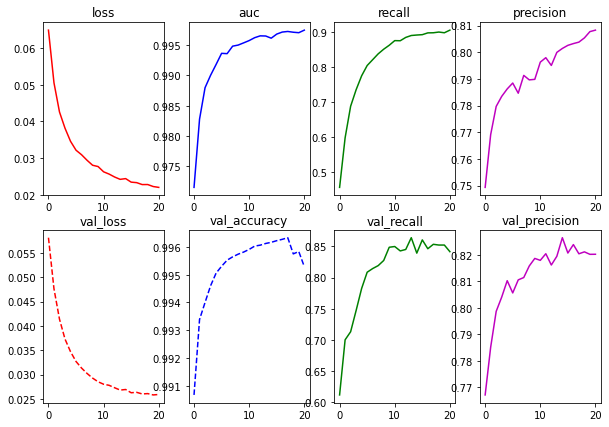

In [142]:
# import matplotlib.pyplot as plt
fig, ax = plt.subplots(2, 4, figsize=(10, 7))

ax[0, 0].set_title('loss')
ax[0, 0].plot(history3.history['loss'], 'r')
ax[0, 1].set_title('auc')
ax[0, 1].plot(history3.history['auc_5'], 'b')
ax[0, 2].set_title('recall')
ax[0, 2].plot(history3.history['recall_5'], 'g')
ax[0, 3].set_title('precision')
ax[0, 3].plot(history3.history['precision_5'], 'm')


ax[1, 0].set_title('val_loss')
ax[1, 0].plot(history3.history['val_loss'], 'r--')
ax[1, 1].set_title('val_accuracy')
ax[1, 1].plot(history3.history['val_auc_5'], 'b--')
ax[1, 2].set_title('val_recall')
ax[1, 2].plot(history3.history['val_recall_5'], 'g')

ax[1, 3].set_title('val_precision')
ax[1, 3].plot(history3.history['val_precision_5'], 'm')


In [143]:
import shap

In [144]:
X_t = X_train[:,0]

In [145]:
a_train = X_t[0:10001]

In [146]:
a_train.shape

(10000, 57)

In [147]:
X_s = X_test[:,0]

In [148]:
a_test = X_s[0:1000]

In [149]:
a_test.shape

(1000, 57)

In [150]:
a_pred = pred[:,0]

In [151]:
a_pred

array([[0.02980131],
       [0.02730256],
       [0.03392684],
       ...,
       [0.01935673],
       [0.03144878],
       [0.03260192]], dtype=float32)

In [152]:
explainer = shap.Explainer(model3, a_train)

In [153]:
shap_values = explainer.shap_values(a_test)

ValueError: Input 0 of layer sequential_5 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (2230, 57)